# Demo notebook for the Tropical Cyclones diagnostic

Before proceeding you should edit output file paths in `config_tcs_notebook.yml`

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import os
from tropical_cyclones import TCs, multi_plot
from aqua.util import load_yaml
from aqua.logger import log_configure
mainlogger = log_configure('INFO', log_name='MAIN')

To run notebook with slurm

In [2]:
from aqua.slurm import slurm
slurm.job(cores=8, memory="50 GB", jobs=1, queue = "interactive", walltime='6:00:00')

2023-11-22 17:33:47 :: slurm :: WARNING  -> #!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -p interactive
#SBATCH -A bb1153
#SBATCH -n 1
#SBATCH --cpus-per-task=8
#SBATCH --mem=47G
#SBATCH -t 6:00:00
#SBATCH --error=./slurm/logs/dask-worker-%j.err
#SBATCH --output=./slurm/output/dask-worker-%j.out

/work/bb1153/b382216/mambaforge/envs/aqua_common/bin/python -m distributed.cli.dask_worker tcp://136.172.124.3:41327 --nthreads 2 --nworkers 4 --memory-limit 11.64GiB --name dummy-name --nanny --death-timeout 60



Info on slurm job

In [3]:
slurm.squeue()

JOBID      CPUS  NODES ST         NAME                 TIME       START_TIME           DEPENDENCY           PARTITION            MIN_MEMORY          
5847323    24    1     R          dask-worker          0:10       2023-07-03T22:02:21  (null)               interactive          47G                 


0

Get variables and other parameters from configuration file and store them in a dictionary. To change experiment and change tempest-extremes 
parameters and streaming options please see the config_tcs_notebook.yaml file in the same notebook dir and adjust it accordingly.

In [2]:
# load the config file
config = load_yaml('config_tcs_notebook.yaml')
config

{'dataset': {'model': 'IFS', 'exp': 'tco1279-orca025-cycle3', 'source2d': '2D_1h_native', 'source3d': '3D_1h_native'}, 'paths': {'tmpdir': '/home/b/b382216/scratch/test/fulldir', 'fulldir': '/home/b/b382216/scratch/test/fulldir', 'plotdir': '/home/b/b382216/work/tc/Figures/'}, 'setup': {'loglevel': 'INFO'}, 'grids': {'lowgrid': 'r100', 'highgrid': 'r100'}, 'varlist': ['msl'], 'time': {'startdate': '2020-01-20', 'enddate': '2025-01-01', 'frequency': '6h'}, 'stream': {'streamstep': '4D'}, 'detect': {'boxdim': 10}, 'stitch': {'n_days_freq': 5, 'n_days_ext': 2}}

Initialises the TCs class and calls the loop_streaming method which is a wrapper to retrieve data, prepare them, run DetectNodes and StitchNodes
and finally save the selected variables (defined in the config.yml file) with original model resolution along TCs tracks in a netcdf file.

In [3]:
# initialise tropical class with streaming options
tropical = TCs(tdict=config, streaming=True,
                stream_step=config['stream']['streamstep'],
                stream_startdate=config['time']['startdate'],
                paths=config['paths'],
                loglevel=config['setup']['loglevel'],
                nproc=1)
tropical.loop_streaming(config)

2023-11-22 18:16:51 :: TCs :: WARNING  -> Model IFS - Exp: tco1279-orca025-cycle3
2023-11-22 18:16:51 :: TCs :: WARNING  -> Initialised streaming for 4D days starting on 2020-01-20
2023-11-22 18:16:52 :: Reader :: INFO     -> Fixes found for model IFS, experiment tco1279-orca025-cycle3, source 2D_1h_native
2023-11-22 18:16:52 :: Reader :: INFO     -> For source 2D_1h_native, method for fixes is: default
2023-11-22 18:16:52 :: yaml :: INFO     -> Updating the log_level to INFO
2023-11-22 18:17:07 :: Reader :: INFO     -> Space_coords deduced from the source are ['value']
2023-11-22 18:17:08 :: Reader :: INFO     -> Data model: ../../../config/data_models/ifs2cds.json
2023-11-22 18:17:08 :: Reader :: INFO     -> Data model: ../../../config/data_models/ifs2cds.json
2023-11-22 18:17:08 :: Reader :: INFO     -> No specific fixes available for model IFS, experiment tco1279-orca025-cycle3, source 3D_1h_native: checking for model default...
2023-11-22 18:17:08 :: Reader :: INFO     -> Using de

[########################################] | 100% Completed | 1.12 sms


2023-11-22 18:17:25 :: TCs :: INFO     -> DetectNodes done in 7.5385 seconds
2023-11-22 18:17:25 :: TCs :: WARNING  -> processing time step 20200120T06
2023-11-22 18:17:25 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200120T06
2023-11-22 18:17:25 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:17:30 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200120T06
2023-11-22 18:17:30 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200120T06
2023-11-22 18:17:30 :: TCs :: INFO     -> store_fullres_field for timestep 20200120T06


[########################################] | 100% Completed | 1.14 sms


2023-11-22 18:17:31 :: TCs :: INFO     -> DetectNodes done in 6.2335 seconds
2023-11-22 18:17:31 :: TCs :: WARNING  -> processing time step 20200120T12
2023-11-22 18:17:31 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200120T12
2023-11-22 18:17:31 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:17:35 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200120T12
2023-11-22 18:17:35 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200120T12
2023-11-22 18:17:35 :: TCs :: INFO     -> store_fullres_field for timestep 20200120T12


[########################################] | 100% Completed | 1.01 sms


2023-11-22 18:17:36 :: TCs :: INFO     -> DetectNodes done in 5.1741 seconds
2023-11-22 18:17:36 :: TCs :: WARNING  -> processing time step 20200120T18
2023-11-22 18:17:36 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200120T18
2023-11-22 18:17:36 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:17:40 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200120T18
2023-11-22 18:17:40 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200120T18
2023-11-22 18:17:40 :: TCs :: INFO     -> store_fullres_field for timestep 20200120T18


[########################################] | 100% Completed | 1.11 sms


2023-11-22 18:17:41 :: TCs :: INFO     -> DetectNodes done in 5.0573 seconds
2023-11-22 18:17:41 :: TCs :: WARNING  -> processing time step 20200121T00
2023-11-22 18:17:41 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200121T00
2023-11-22 18:17:42 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:17:45 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200121T00
2023-11-22 18:17:46 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200121T00
2023-11-22 18:17:46 :: TCs :: INFO     -> store_fullres_field for timestep 20200121T00


[########################################] | 100% Completed | 1.02 sms


2023-11-22 18:17:47 :: TCs :: INFO     -> DetectNodes done in 5.3373 seconds
2023-11-22 18:17:47 :: TCs :: WARNING  -> processing time step 20200121T06
2023-11-22 18:17:47 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200121T06
2023-11-22 18:17:47 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:17:51 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200121T06
2023-11-22 18:17:51 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200121T06
2023-11-22 18:17:51 :: TCs :: INFO     -> store_fullres_field for timestep 20200121T06


[########################################] | 100% Completed | 1.02 sms


2023-11-22 18:17:52 :: TCs :: INFO     -> DetectNodes done in 5.7598 seconds
2023-11-22 18:17:52 :: TCs :: WARNING  -> processing time step 20200121T12
2023-11-22 18:17:52 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200121T12
2023-11-22 18:17:53 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:17:57 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200121T12
2023-11-22 18:17:57 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200121T12
2023-11-22 18:17:57 :: TCs :: INFO     -> store_fullres_field for timestep 20200121T12


[########################################] | 100% Completed | 907.38 ms


2023-11-22 18:17:58 :: TCs :: INFO     -> DetectNodes done in 5.6740 seconds
2023-11-22 18:17:58 :: TCs :: WARNING  -> processing time step 20200121T18
2023-11-22 18:17:58 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200121T18
2023-11-22 18:17:58 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:02 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200121T18
2023-11-22 18:18:02 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200121T18
2023-11-22 18:18:02 :: TCs :: INFO     -> store_fullres_field for timestep 20200121T18


[########################################] | 100% Completed | 1.01 sms


2023-11-22 18:18:03 :: TCs :: INFO     -> DetectNodes done in 5.1468 seconds
2023-11-22 18:18:03 :: TCs :: WARNING  -> processing time step 20200122T00
2023-11-22 18:18:03 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200122T00
2023-11-22 18:18:03 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:07 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200122T00
2023-11-22 18:18:08 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200122T00
2023-11-22 18:18:08 :: TCs :: INFO     -> store_fullres_field for timestep 20200122T00


[########################################] | 100% Completed | 1.12 sms


2023-11-22 18:18:09 :: TCs :: INFO     -> DetectNodes done in 5.5167 seconds
2023-11-22 18:18:09 :: TCs :: WARNING  -> processing time step 20200122T06
2023-11-22 18:18:09 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200122T06
2023-11-22 18:18:09 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:13 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200122T06
2023-11-22 18:18:13 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200122T06
2023-11-22 18:18:13 :: TCs :: INFO     -> store_fullres_field for timestep 20200122T06


[########################################] | 100% Completed | 1.02 sms


2023-11-22 18:18:14 :: TCs :: INFO     -> DetectNodes done in 5.6498 seconds
2023-11-22 18:18:14 :: TCs :: WARNING  -> processing time step 20200122T12
2023-11-22 18:18:14 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200122T12
2023-11-22 18:18:15 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:18 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200122T12
2023-11-22 18:18:18 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200122T12
2023-11-22 18:18:18 :: TCs :: INFO     -> store_fullres_field for timestep 20200122T12


[########################################] | 100% Completed | 1.11 sms


2023-11-22 18:18:20 :: TCs :: INFO     -> DetectNodes done in 5.1114 seconds
2023-11-22 18:18:20 :: TCs :: WARNING  -> processing time step 20200122T18
2023-11-22 18:18:20 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200122T18
2023-11-22 18:18:20 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:24 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200122T18
2023-11-22 18:18:24 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200122T18
2023-11-22 18:18:24 :: TCs :: INFO     -> store_fullres_field for timestep 20200122T18


[########################################] | 100% Completed | 1.11 sms


2023-11-22 18:18:25 :: TCs :: INFO     -> DetectNodes done in 5.4205 seconds
2023-11-22 18:18:25 :: TCs :: WARNING  -> processing time step 20200123T00
2023-11-22 18:18:25 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200123T00
2023-11-22 18:18:25 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:29 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200123T00
2023-11-22 18:18:29 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200123T00
2023-11-22 18:18:29 :: TCs :: INFO     -> store_fullres_field for timestep 20200123T00


[########################################] | 100% Completed | 1.02 sms


2023-11-22 18:18:30 :: TCs :: INFO     -> DetectNodes done in 5.1164 seconds
2023-11-22 18:18:30 :: TCs :: WARNING  -> processing time step 20200123T06
2023-11-22 18:18:30 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200123T06
2023-11-22 18:18:30 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:34 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200123T06
2023-11-22 18:18:34 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200123T06
2023-11-22 18:18:34 :: TCs :: INFO     -> store_fullres_field for timestep 20200123T06


[########################################] | 100% Completed | 1.21 sms


2023-11-22 18:18:35 :: TCs :: INFO     -> DetectNodes done in 5.1962 seconds
2023-11-22 18:18:35 :: TCs :: WARNING  -> processing time step 20200123T12
2023-11-22 18:18:35 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200123T12
2023-11-22 18:18:35 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:39 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200123T12
2023-11-22 18:18:39 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200123T12
2023-11-22 18:18:40 :: TCs :: INFO     -> store_fullres_field for timestep 20200123T12


[########################################] | 100% Completed | 1.02 sms


2023-11-22 18:18:41 :: TCs :: INFO     -> DetectNodes done in 5.3066 seconds
2023-11-22 18:18:41 :: TCs :: WARNING  -> processing time step 20200123T18
2023-11-22 18:18:41 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200123T18
2023-11-22 18:18:41 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:45 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200123T18
2023-11-22 18:18:45 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200123T18
2023-11-22 18:18:45 :: TCs :: INFO     -> store_fullres_field for timestep 20200123T18


[########################################] | 100% Completed | 1.01 sms


2023-11-22 18:18:46 :: TCs :: INFO     -> DetectNodes done in 5.0812 seconds
2023-11-22 18:18:46 :: Reader :: INFO     -> Retrieving variables: ['msl', '10u', '10v', 'z']
2023-11-22 18:18:46 :: Reader :: INFO     -> Data model: ../../../config/data_models/ifs2cds.json


entered the loop


2023-11-22 18:18:46 :: Reader :: INFO     -> Retrieving variables: ['z']
2023-11-22 18:18:46 :: Reader :: INFO     -> Data model: ../../../config/data_models/ifs2cds.json
2023-11-22 18:18:47 :: Reader :: INFO     -> Retrieving variables: ['msl']
2023-11-22 18:18:47 :: Reader :: INFO     -> Data model: ../../../config/data_models/ifs2cds.json
2023-11-22 18:18:47 :: TCs :: WARNING  -> New streaming from 20200124T00 to 20200127T23
2023-11-22 18:18:47 :: TCs :: WARNING  -> processing time step 20200124T00
2023-11-22 18:18:47 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200124T00
2023-11-22 18:18:48 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:52 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200124T00
2023-11-22 18:18:53 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200124T00
2023-11-22 18:18:53 :: TCs :: INFO     -> store_fullres_field for timestep 20200124T00


[########################################] | 100% Completed | 913.39 ms


2023-11-22 18:18:54 :: TCs :: INFO     -> DetectNodes done in 6.1330 seconds
2023-11-22 18:18:54 :: TCs :: WARNING  -> processing time step 20200124T06
2023-11-22 18:18:54 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200124T06
2023-11-22 18:18:54 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:18:58 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200124T06
2023-11-22 18:18:58 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200124T06
2023-11-22 18:18:58 :: TCs :: INFO     -> store_fullres_field for timestep 20200124T06


[########################################] | 100% Completed | 1.12 sms


2023-11-22 18:19:00 :: TCs :: INFO     -> DetectNodes done in 6.0596 seconds
2023-11-22 18:19:00 :: TCs :: WARNING  -> processing time step 20200124T12
2023-11-22 18:19:00 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200124T12
2023-11-22 18:19:00 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:19:05 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200124T12
2023-11-22 18:19:05 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200124T12
2023-11-22 18:19:05 :: TCs :: INFO     -> store_fullres_field for timestep 20200124T12


[########################################] | 100% Completed | 1.13 sms


2023-11-22 18:19:06 :: TCs :: INFO     -> DetectNodes done in 6.6543 seconds
2023-11-22 18:19:06 :: TCs :: WARNING  -> processing time step 20200124T18
2023-11-22 18:19:06 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200124T18
2023-11-22 18:19:07 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:19:12 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200124T18
2023-11-22 18:19:12 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200124T18
2023-11-22 18:19:12 :: TCs :: INFO     -> store_fullres_field for timestep 20200124T18


[########################################] | 100% Completed | 1.22 sms


2023-11-22 18:19:13 :: TCs :: INFO     -> DetectNodes done in 6.7121 seconds
2023-11-22 18:19:13 :: TCs :: WARNING  -> processing time step 20200125T00
2023-11-22 18:19:13 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200125T00
2023-11-22 18:19:13 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:19:18 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200125T00
2023-11-22 18:19:18 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200125T00
2023-11-22 18:19:18 :: TCs :: INFO     -> store_fullres_field for timestep 20200125T00


[########################################] | 100% Completed | 1.11 sms


2023-11-22 18:19:20 :: TCs :: INFO     -> DetectNodes done in 6.5381 seconds
2023-11-22 18:19:20 :: TCs :: WARNING  -> processing time step 20200125T06
2023-11-22 18:19:20 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200125T06
2023-11-22 18:19:20 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:19:25 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200125T06
2023-11-22 18:19:25 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200125T06
2023-11-22 18:19:25 :: TCs :: INFO     -> store_fullres_field for timestep 20200125T06


[########################################] | 100% Completed | 1.22 sms


2023-11-22 18:19:26 :: TCs :: INFO     -> DetectNodes done in 6.6815 seconds
2023-11-22 18:19:26 :: TCs :: WARNING  -> processing time step 20200125T12
2023-11-22 18:19:26 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200125T12
2023-11-22 18:19:26 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:19:31 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200125T12
2023-11-22 18:19:32 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200125T12
2023-11-22 18:19:32 :: TCs :: INFO     -> store_fullres_field for timestep 20200125T12


[########################################] | 100% Completed | 912.36 ms


2023-11-22 18:19:33 :: TCs :: INFO     -> DetectNodes done in 6.4177 seconds
2023-11-22 18:19:33 :: TCs :: WARNING  -> processing time step 20200125T18
2023-11-22 18:19:33 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200125T18
2023-11-22 18:19:33 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:19:37 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200125T18
2023-11-22 18:19:37 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200125T18
2023-11-22 18:19:37 :: TCs :: INFO     -> store_fullres_field for timestep 20200125T18


[########################################] | 100% Completed | 1.21 sms


2023-11-22 18:19:39 :: TCs :: INFO     -> DetectNodes done in 5.9906 seconds
2023-11-22 18:19:39 :: TCs :: WARNING  -> processing time step 20200126T00
2023-11-22 18:19:39 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200126T00
2023-11-22 18:19:39 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:19:43 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200126T00
2023-11-22 18:19:43 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200126T00
2023-11-22 18:19:43 :: TCs :: INFO     -> store_fullres_field for timestep 20200126T00


[########################################] | 100% Completed | 1.11 sms


2023-11-22 18:19:44 :: TCs :: INFO     -> DetectNodes done in 5.7140 seconds
2023-11-22 18:19:44 :: TCs :: WARNING  -> processing time step 20200126T06
2023-11-22 18:19:44 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200126T06
2023-11-22 18:19:45 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:19:49 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200126T06
2023-11-22 18:19:50 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200126T06
2023-11-22 18:19:50 :: TCs :: INFO     -> store_fullres_field for timestep 20200126T06


[########################################] | 100% Completed | 1.02 sms


2023-11-22 18:19:51 :: TCs :: INFO     -> DetectNodes done in 6.3076 seconds
2023-11-22 18:19:51 :: TCs :: WARNING  -> processing time step 20200126T12
2023-11-22 18:19:51 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200126T12
2023-11-22 18:19:51 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:19:55 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200126T12
2023-11-22 18:19:55 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200126T12
2023-11-22 18:19:55 :: TCs :: INFO     -> store_fullres_field for timestep 20200126T12


[########################################] | 100% Completed | 1.11 sms


2023-11-22 18:19:56 :: TCs :: INFO     -> DetectNodes done in 5.5897 seconds
2023-11-22 18:19:56 :: TCs :: WARNING  -> processing time step 20200126T18
2023-11-22 18:19:56 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200126T18
2023-11-22 18:19:56 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:20:01 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200126T18
2023-11-22 18:20:02 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200126T18
2023-11-22 18:20:02 :: TCs :: INFO     -> store_fullres_field for timestep 20200126T18


[########################################] | 100% Completed | 1.01 sms


2023-11-22 18:20:03 :: TCs :: INFO     -> DetectNodes done in 6.4114 seconds
2023-11-22 18:20:03 :: TCs :: WARNING  -> processing time step 20200127T00
2023-11-22 18:20:03 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200127T00
2023-11-22 18:20:03 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:20:07 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200127T00
2023-11-22 18:20:07 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200127T00
2023-11-22 18:20:07 :: TCs :: INFO     -> store_fullres_field for timestep 20200127T00


[########################################] | 100% Completed | 911.59 ms


2023-11-22 18:20:08 :: TCs :: INFO     -> DetectNodes done in 5.3702 seconds
2023-11-22 18:20:08 :: TCs :: WARNING  -> processing time step 20200127T06
2023-11-22 18:20:08 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200127T06
2023-11-22 18:20:08 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:20:12 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200127T06
2023-11-22 18:20:12 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200127T06
2023-11-22 18:20:12 :: TCs :: INFO     -> store_fullres_field for timestep 20200127T06


[########################################] | 100% Completed | 1.03 sms


2023-11-22 18:20:13 :: TCs :: INFO     -> DetectNodes done in 5.3465 seconds
2023-11-22 18:20:13 :: TCs :: WARNING  -> processing time step 20200127T12
2023-11-22 18:20:13 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200127T12
2023-11-22 18:20:14 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:20:18 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200127T12
2023-11-22 18:20:18 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200127T12
2023-11-22 18:20:18 :: TCs :: INFO     -> store_fullres_field for timestep 20200127T12


[########################################] | 100% Completed | 908.49 ms


2023-11-22 18:20:19 :: TCs :: INFO     -> DetectNodes done in 5.5408 seconds
2023-11-22 18:20:19 :: TCs :: WARNING  -> processing time step 20200127T18
2023-11-22 18:20:19 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200127T18
2023-11-22 18:20:19 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:20:23 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200127T18
2023-11-22 18:20:23 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200127T18
2023-11-22 18:20:23 :: TCs :: INFO     -> store_fullres_field for timestep 20200127T18


[########################################] | 100% Completed | 1.01 sms


2023-11-22 18:20:24 :: TCs :: INFO     -> DetectNodes done in 5.3970 seconds
2023-11-22 18:20:24 :: Reader :: INFO     -> Retrieving variables: ['msl', '10u', '10v', 'z']
2023-11-22 18:20:24 :: Reader :: INFO     -> Data model: ../../../config/data_models/ifs2cds.json


entered the loop


2023-11-22 18:20:25 :: Reader :: INFO     -> Retrieving variables: ['z']
2023-11-22 18:20:25 :: Reader :: INFO     -> Data model: ../../../config/data_models/ifs2cds.json
2023-11-22 18:20:26 :: Reader :: INFO     -> Retrieving variables: ['msl']
2023-11-22 18:20:26 :: Reader :: INFO     -> Data model: ../../../config/data_models/ifs2cds.json
2023-11-22 18:20:26 :: TCs :: WARNING  -> New streaming from 20200128T00 to 20200131T23
2023-11-22 18:20:26 :: TCs :: WARNING  -> processing time step 20200128T00
2023-11-22 18:20:26 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200128T00
2023-11-22 18:20:26 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:20:30 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200128T00
2023-11-22 18:20:30 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200128T00
2023-11-22 18:20:31 :: TCs :: INFO     -> store_fullres_field for timestep 20200128T00


[########################################] | 100% Completed | 914.53 ms


2023-11-22 18:20:31 :: TCs :: INFO     -> DetectNodes done in 5.3437 seconds
2023-11-22 18:20:31 :: TCs :: WARNING  -> processing time step 20200128T06
2023-11-22 18:20:31 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200128T06
2023-11-22 18:20:32 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:20:36 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200128T06
2023-11-22 18:20:36 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200128T06
2023-11-22 18:20:36 :: TCs :: INFO     -> store_fullres_field for timestep 20200128T06


[########################################] | 100% Completed | 1.02 sms


2023-11-22 18:20:37 :: TCs :: INFO     -> DetectNodes done in 5.7534 seconds
2023-11-22 18:20:37 :: TCs :: WARNING  -> processing time step 20200128T12
2023-11-22 18:20:37 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200128T12
2023-11-22 18:20:37 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:20:41 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200128T12
2023-11-22 18:20:42 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200128T12
2023-11-22 18:20:42 :: TCs :: INFO     -> store_fullres_field for timestep 20200128T12


[########################################] | 100% Completed | 906.93 ms


2023-11-22 18:20:43 :: TCs :: INFO     -> DetectNodes done in 5.2590 seconds
2023-11-22 18:20:43 :: TCs :: WARNING  -> processing time step 20200128T18
2023-11-22 18:20:43 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200128T18
2023-11-22 18:20:43 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 18:20:47 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200128T18
2023-11-22 18:20:47 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200128T18
2023-11-22 18:20:47 :: TCs :: INFO     -> store_fullres_field for timestep 20200128T18


[################                        ] | 41% Completed | 503.30 ms


KeyboardInterrupt: 

Plot some variables following a track for a few time steps
First select a track file to open. Tracks files are contained in the $fulldir (see config file)
Select a start-end date for a period during which you want to plot variables

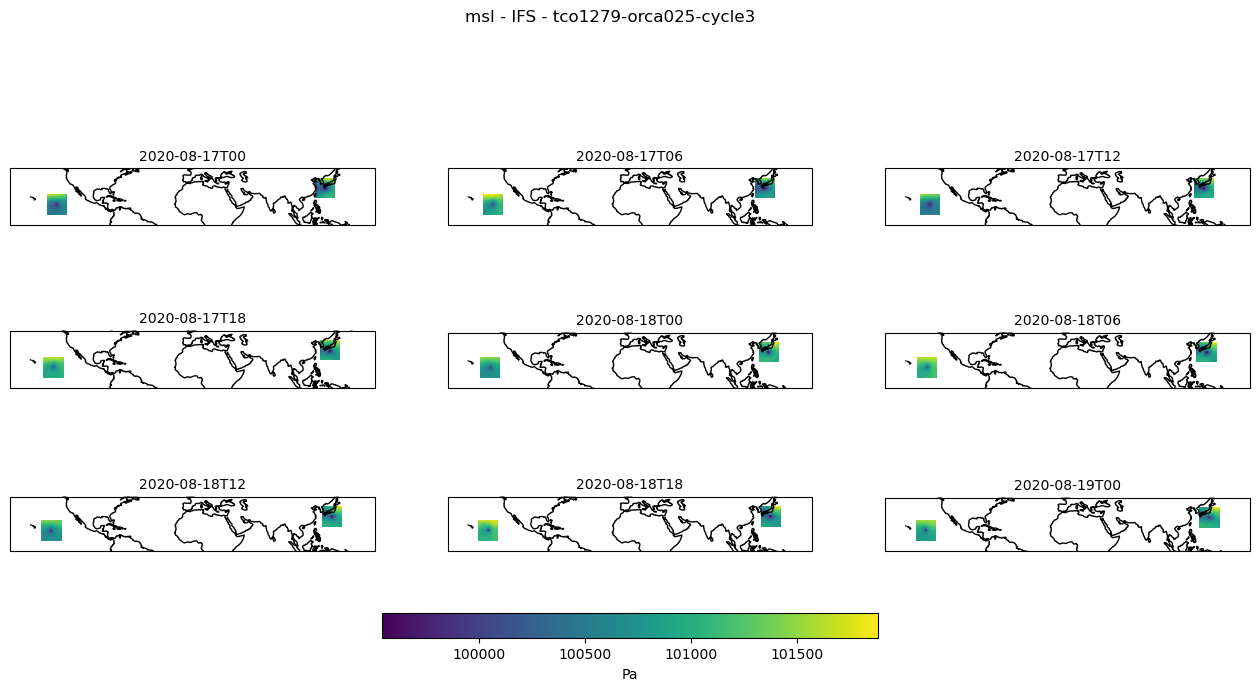

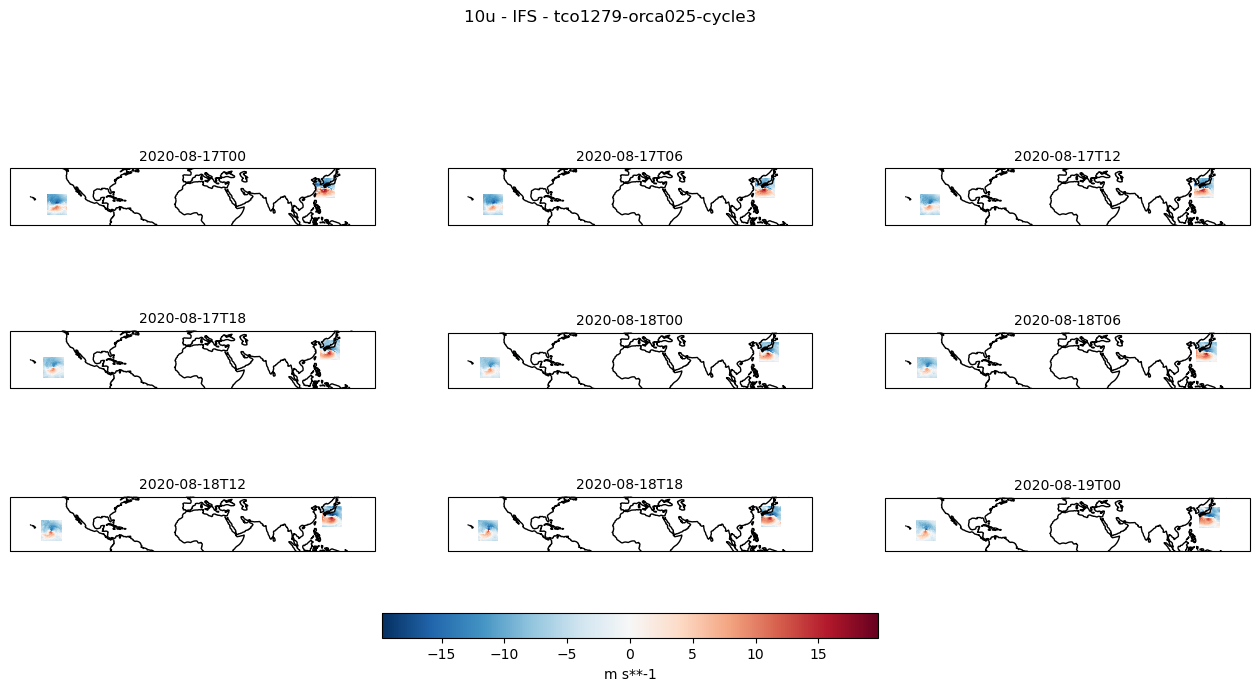

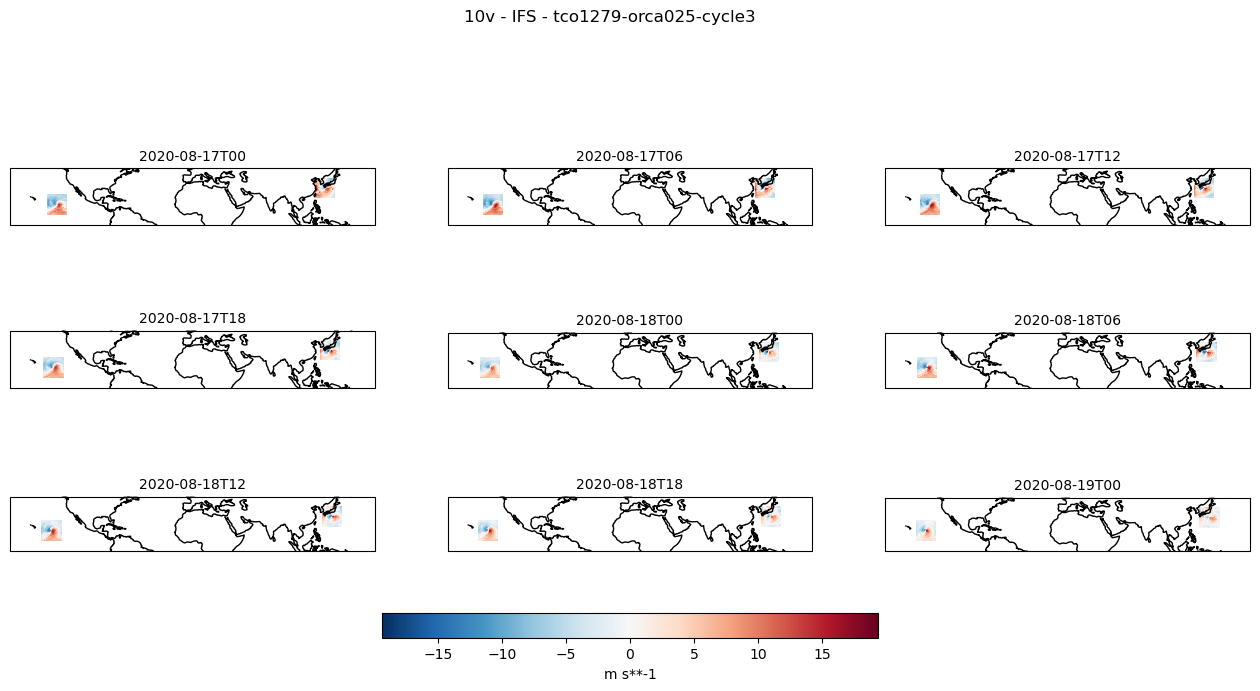

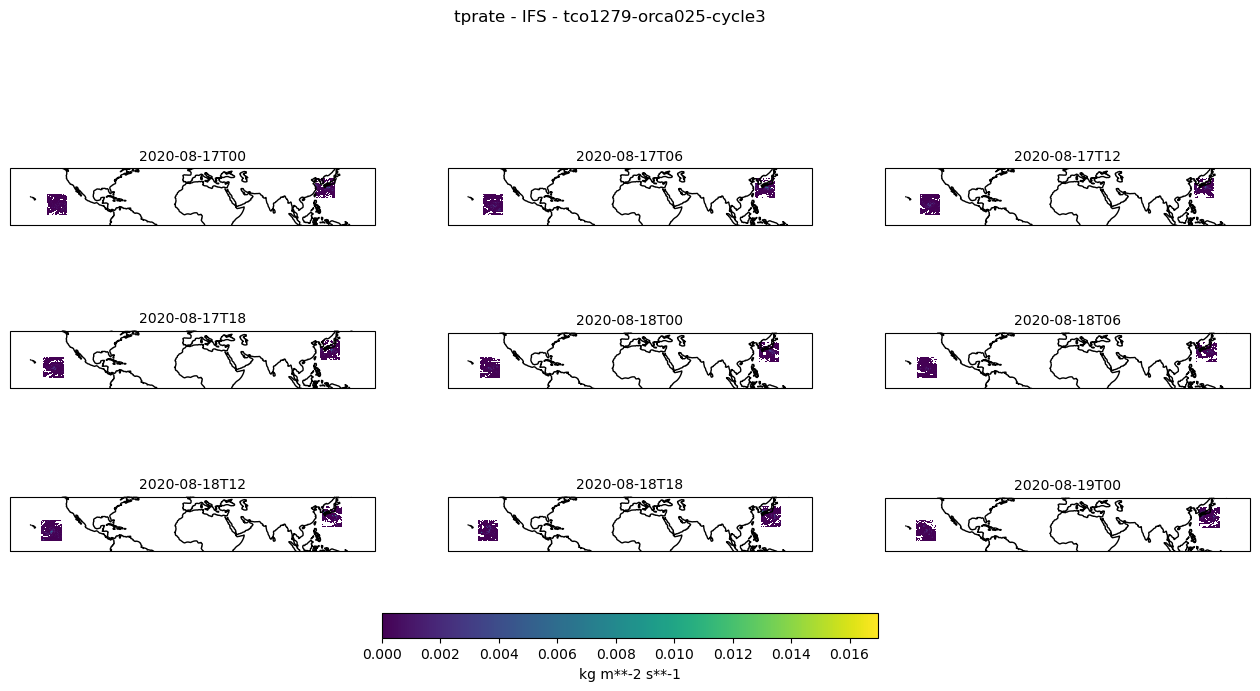

In [6]:
# at first select a track file to open. Tracks files are contained in the fulldir (see config file)

# select a start-end date for a period during which you want to plot variables

startend="20200817-20200915"
tracks_nc_file = os.path.join(tdict['paths']['fulldir'], f"{tdict['dataset']['model']}-{tdict['dataset']['exp']}/tempest_tracks_{startend}.nc")

# Example plot for variables contained in varlist:
for var in tdict['varlist']: 
    tracks_nc_file_var = xr.open_dataset(tracks_nc_file)[var]
    multi_plot(tracks_nc_file_var, tdict, save=False)

First select a track file to open. Tracks files are contained in the $fulldir (see config file)
select a start-end date for a period during which you want to plot variables

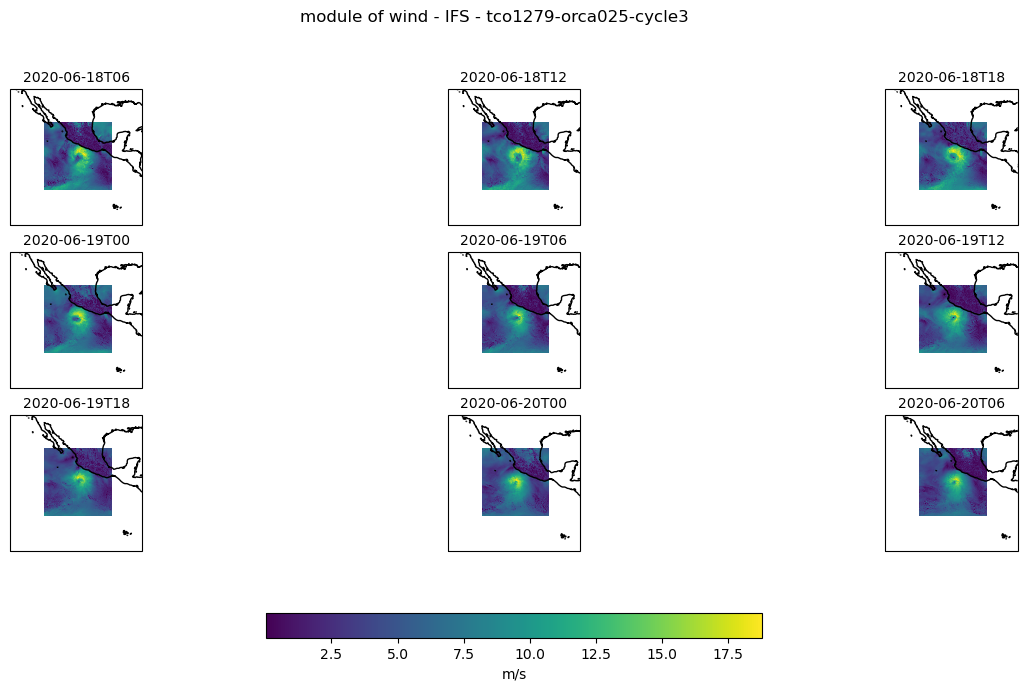

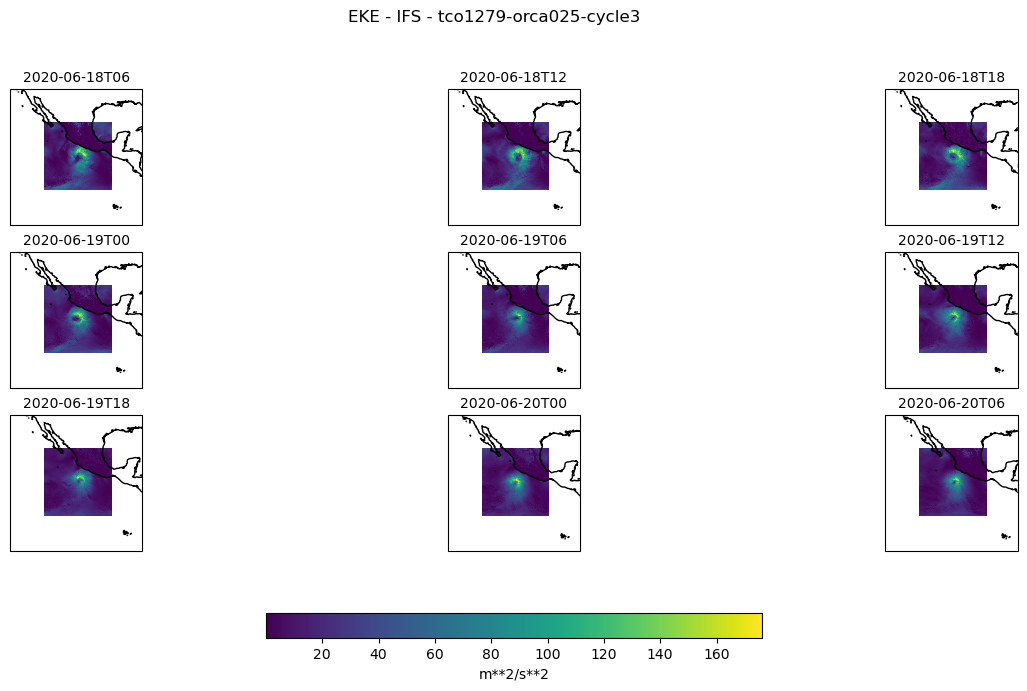

In [8]:


startend="20200618-20200717"
tracks_nc_file = os.path.join(tdict['paths']['fulldir'], f"{tdict['dataset']['model']}-{tdict['dataset']['exp']}/tempest_tracks_{startend}.nc")

# Example plot for module of wind and Eddy Kinetik Energy (EKE) (if 10u and 10v are available):

tracks_nc_file_u = xr.open_dataset(tracks_nc_file)["10u"]
tracks_nc_file_v = xr.open_dataset(tracks_nc_file)["10v"]

# module of wind
tracks_nc_file_uvmod = (tracks_nc_file_u**2 + tracks_nc_file_v**2)**0.5
multi_plot(tracks_nc_file_uvmod, tdict, title="module of wind", units="m/s")

# EKE
tracks_nc_file_EKE = 0.5*(tracks_nc_file_u**2 + tracks_nc_file_v**2)
multi_plot(tracks_nc_file_EKE, tdict, title="EKE", units="m**2/s**2")

Finally plot all TCs tracks found in the simulation

Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/scratch/tmpdir/IFS/tco1279-orca025-cycle3/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 295 trajectories
... done reading data


/work/bb1153/b382216/mambaforge/envs/TCs/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/work/bb1153/b382216/mambaforge/envs/TCs/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


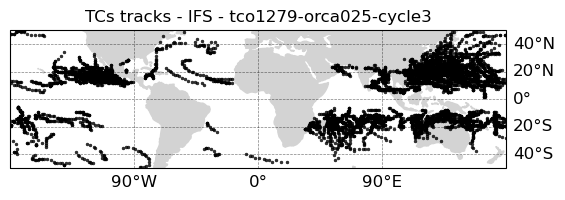

In [4]:
from glob import glob

filenames = sorted(glob(os.path.join(tdict['paths']['tmpdir'], tdict['dataset']['model'], tdict['dataset']['exp'], "tempest_track*.txt")))

with open(os.path.join(tdict['paths']['tmpdir'], tdict['dataset']['model'], tdict['dataset']['exp'], f"tempest_tracks_tot.txt"), 'w') as output_file:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                output_file.write(line)
tracks_file = os.path.join(tdict['paths']['tmpdir'], tdict['dataset']['model'], tdict['dataset']['exp'], "tempest_tracks_tot.txt")
plot_trajectories(tracks_file, tdict)